 Activity 1 :Quadratic Forms

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg #(to find eigenvalues,decompositions )
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandoc

In [66]:
def quadraticform_analyze(c, a, B):
    
   ### Display inputs
    print("***Inputs***")
    print("c = ",c,"\n")
    print("a = ",a,"\n")
    print("B = \n",B,"\n")
    
    ### Eigendecomposition
    print("***Eigendecomposition***")
    l, V = linalg.eig(B)
    print("Lambda = \n",np.diag(l),"\n")
    print("V = \n",V,"\n")
    
    ### Calculate stationary point
    n = len(a)
    zstar = np.zeros(n)
    
    abar = (V.transpose()).dot(a)
    print("abar = \n",abar,"\n")
    
    # Loop over dimensions
    for j in range(0,n):
        # If eigenvalue is NOT zero
        ##
        # Previous code
        # if(l[j] != 0):
        ##
        # More stable version
        if(abs(l[j]) > 1E-8):
            zstar[j] = -abar[j]/np.real(l[j])
        
        # Otherwise check is abar is nonzero
        elif(abar[j] !=0):
            print("WARNING: No stationary point exists.")
    
    xstar = V.dot(zstar)
    
    print("***(Possible) Stationary Point in Transformed Coordinates:")
    print("z* = ",zstar,"\n")
    
    print("***(Possible) Stationary Point in Original Coordinates:")
    print("x* = ",xstar,"\n")
    
    ### Check function value and gradient
    fval = c + a.dot(xstar) + 0.5*xstar.dot(B.dot(xstar))
    grad = a + xstar.dot(B)
    
    print("***Checking function and gradient***")
    print("f(x*) = ",fval)
    print("f'(x*) = \n",grad,"\n")
    
    ### Make 3D plot
    # Tutorial: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    if(n == 2):
        # Create vectors in both dimensions
        dx = 5
        x1 = np.arange(xstar[0]-dx,xstar[0]+dx,0.25)
        x2 = np.arange(xstar[1]-dx,xstar[1]+dx,0.25)
        
        # Create a matrix of all points to sample
        X1, X2 = np.meshgrid(x1, x2)
        n1 = len(x1)
        n2 = len(x2)
        F = np.zeros([n2, n1])
        xtemp = np.zeros(2)
        for i in range(0,n1):
            xtemp[0] = x1[i]
            for j in range(0,n2):
                xtemp[1] = x2[j]
                F[j,i] = c + a.dot(xtemp) + 0.5*xtemp.dot(B.dot(xtemp))
        
        # Create 3D figure
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        # Plot f(x)
        surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)
        
        # Add (possible) stationary point
        ax.scatter(xstar[0],xstar[1],fval,s=50,color="green",depthshade=True)
        
        # Draw vertical line through stationary point to help visualization
        # Maximum value in array
        fmax = np.amax(F)
        fmin = np.amin(F)
        ax.plot([xstar[0], xstar[0]], [xstar[1], xstar[1]], [fmin,fmax],color="green")
        
        plt.show()

Inputs:
    c - offset (scalar)
    a - linear coefficients (vector)
    B - quadratic coefficients (matrix)

Activity 1 - a)

***Inputs***
c =  0 

a =  [1 1] 

B = 
 [[0 0]
 [0 0]] 

***Eigendecomposition***
Lambda = 
 [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]] 

V = 
 [[1. 0.]
 [0. 1.]] 

abar = 
 [1. 1.] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [0. 0.] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [0. 0.] 

***Checking function and gradient***
f(x*) =  0.0
f'(x*) = 
 [1. 1.] 



/var/folders/ws/jnwx185n21lfrzd6xh5jj9lw0000gn/T/ipykernel_67915/2307390059.py:75: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


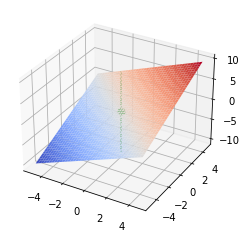

In [67]:
#for example you can call the function in this way
c = 0
a = np.array([1, 1])
B = np.array([[0,0],[0,0]])

quadraticform_analyze(c,a,B)

Activity 1 - b)

***Inputs***
c =  3 

a =  [0 0] 

B = 
 [[ 2 -2]
 [-2  2]] 

***Eigendecomposition***
Lambda = 
 [[4.0000000e+00+0.j 0.0000000e+00+0.j]
 [0.0000000e+00+0.j 4.4408921e-16+0.j]] 

V = 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

abar = 
 [0. 0.] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [-0.  0.] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [0. 0.] 

***Checking function and gradient***
f(x*) =  3.0
f'(x*) = 
 [0. 0.] 



/var/folders/ws/jnwx185n21lfrzd6xh5jj9lw0000gn/T/ipykernel_67915/2307390059.py:75: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


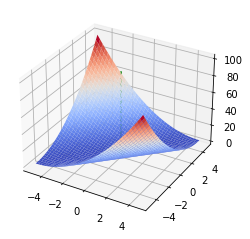

In [68]:
c = 3
a = np.array([0, 0])
B = 2*np.array([[1,-1],[-1,1]])

quadraticform_analyze(c,a,B)

Activity 2 : Finite diference to find derivatives

a)

In [69]:
# Define the  function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 1.0

# Calculate function value at x = a
fa = my_f(a)

# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

Forward Finite Difference

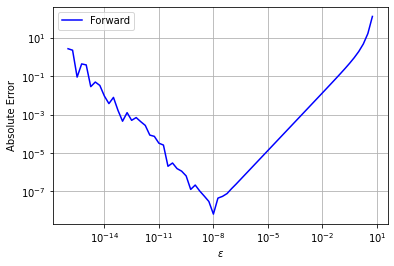

In [70]:
# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()

Backward Finite Difference

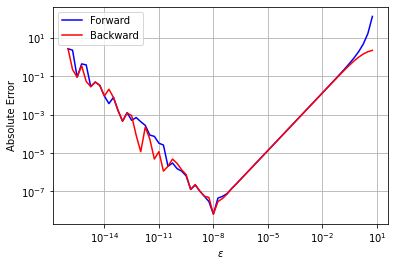

In [71]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - my_f(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

Central Finite Difference¶

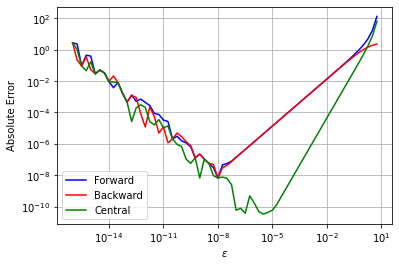

In [72]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (my_f(a + eps[i]) - my_f(a - eps[i]))/(2*eps[i])
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

b)

In [73]:
# Define the  function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 10

# Calculate function value at x = a
fa = my_f(a)

# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

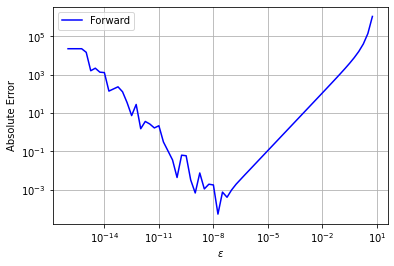

In [74]:
# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()

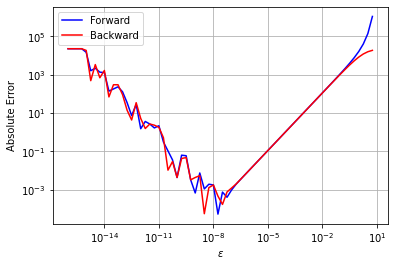

In [75]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - my_f(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

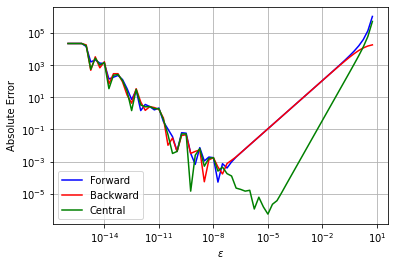

In [76]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (my_f(a + eps[i]) - my_f(a - eps[i]))/(2*eps[i])
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

c)

In [77]:
# Define the  function
def my_f(x):
    return np.log(x)

# Specify point to examine
a = 10

# Calculate function value at x = a
fa = my_f(a)

# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

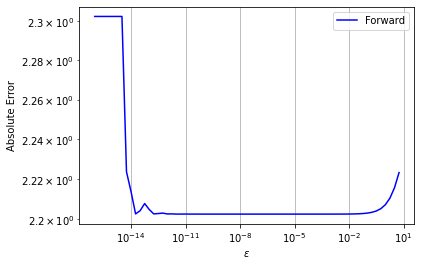

In [78]:
# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()

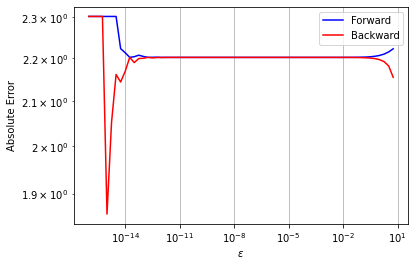

In [79]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - my_f(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

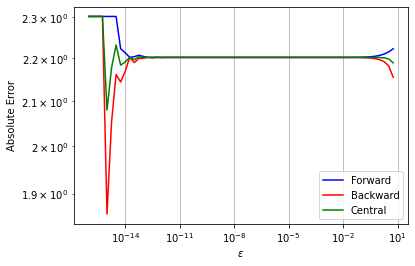

In [80]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (my_f(a + eps[i]) - my_f(a - eps[i]))/(2*eps[i])
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

d) Are there any general trends from these computational experiments?

It can be observed that Absolute error has a minimum at a particular epsilon value(let it be epsilon*). Absolute error is higher for values greater or less than epsilon*. Absolute error increases unexpectedly when epsilon is reduced below epsilon*. This is due to roundoff errors.
